In [29]:
from pathlib import Path
import random

from utils import compare_metadata, generate_plots
from librep.datasets.har import loaders

from librep.datasets.har.loaders import PandasMultiModalLoader, KuHar_BalancedView20HzMotionSenseEquivalent


In [30]:
standartized_codes = {
    0: "sit",
    1: "stand",
    2: "walk",
    3: "stair up",
    4: "stair down",
    5: "run",
    6: "stair up and down"
}

In [31]:
raw_view_path = Path("../data/processed/UCI/raw_balanced_2")
processed_view_path = Path("../data/processed/UCI/standartized_balanced_2")

train_raw, validation_raw, test_raw = PandasMultiModalLoader(raw_view_path).load(
    label="standard activity code"
)
train_processed, validation_processed, test_processed = PandasMultiModalLoader(
    processed_view_path
).load(label="standard activity code")


In [32]:
train_processed.data

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-17,gyro-z-18,gyro-z-19,activity code,index,txt,level_0,serial,user,standard activity code
0,-1.479230,-0.879040,-1.240574,-2.810689,-3.208523,-0.037230,-1.446510,0.135504,1.264642,4.696350,...,-0.061300,-0.205117,-0.141821,1.0,10568.0,data/raw/UCI/RawData/gyro_exp57_user28.txt,754277,57,28,2
1,4.128190,2.473623,-2.609037,2.228619,1.814235,-2.948384,-2.670948,-3.342838,-1.582435,0.555882,...,-0.423723,0.061835,0.295688,1.0,8767.0,data/raw/UCI/RawData/gyro_exp24_user12.txt,282561,24,12,2
2,1.070159,-1.567706,-2.870926,-3.487308,-2.217945,0.546897,1.372534,2.740481,5.630005,-1.477080,...,0.285202,0.026515,-0.193232,1.0,10391.0,data/raw/UCI/RawData/gyro_exp35_user17.txt,431766,35,17,2
3,-3.618041,0.107398,-1.131896,-2.370547,-0.435750,-0.573161,-0.217349,1.187802,2.363631,3.181578,...,0.200131,-0.041369,-0.350603,1.0,8999.0,data/raw/UCI/RawData/gyro_exp26_user13.txt,308721,26,13,2
4,-1.355310,-1.496794,0.128437,-1.208096,-1.957454,2.753179,2.785323,1.240221,1.842179,0.583293,...,0.073106,0.078842,1.035320,1.0,10552.0,data/raw/UCI/RawData/gyro_exp46_user23.txt,589245,46,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,-0.356953,-0.253262,-0.118722,0.381754,-0.021940,-0.539763,-0.247783,-0.676104,0.749001,0.302432,...,-0.099528,0.002682,0.099881,5.0,343.0,data/raw/UCI/RawData/gyro_exp41_user20.txt,509443,41,20,1
7486,0.001268,0.032876,0.068794,-0.019795,0.046246,-0.104697,-0.016302,-0.009948,-0.163925,-0.282908,...,-0.056740,-0.037863,-0.045579,5.0,408.0,data/raw/UCI/RawData/gyro_exp19_user10.txt,226527,19,10,1
7487,0.005928,-0.006889,-0.005579,-0.013707,-0.030865,0.024328,-0.035434,-0.009528,-0.016016,0.039960,...,-0.001768,-0.007431,-0.006912,5.0,984.0,data/raw/UCI/RawData/gyro_exp47_user23.txt,595608,47,23,1
7488,-0.007036,-0.039625,0.022566,-0.026294,0.027090,0.040604,-0.028505,0.031700,-0.010407,-0.048228,...,-0.015607,-0.012140,-0.004146,5.0,1118.0,data/raw/UCI/RawData/gyro_exp39_user19.txt,481979,39,19,1


In [33]:
selected_samples = range(5)

for i in selected_samples:
    label = standartized_codes[train_raw[i][1]]

    fig = generate_plots(
        train_raw,
        train_processed,
        sample_no=i,
        windows=["accel-x", "accel-y", "accel-z"],
        height=800,
        width=1200,
        names=["Raw", "Normalized"],
        vertical_spacing=0.1,
        title=f"UCI sample {i} ({label})",
        x_title="x (time)",
        y_title="y (varies)",
    )
    fig.show()


In [34]:
from librep.transforms.fft import FFT
from librep.datasets.multimodal.operations import DatasetWindowedTransform

transformer = DatasetWindowedTransform(transform=FFT(centered=True), do_fit=False, new_suffix=".fft")
fft_train_raw, fft_validation_raw, fft_test_raw = transformer(train_raw), transformer(validation_raw), transformer(test_raw)
fft_train_processed, fft_validation_processed, fft_test_processed = transformer(train_processed), transformer(validation_processed), transformer(test_processed)

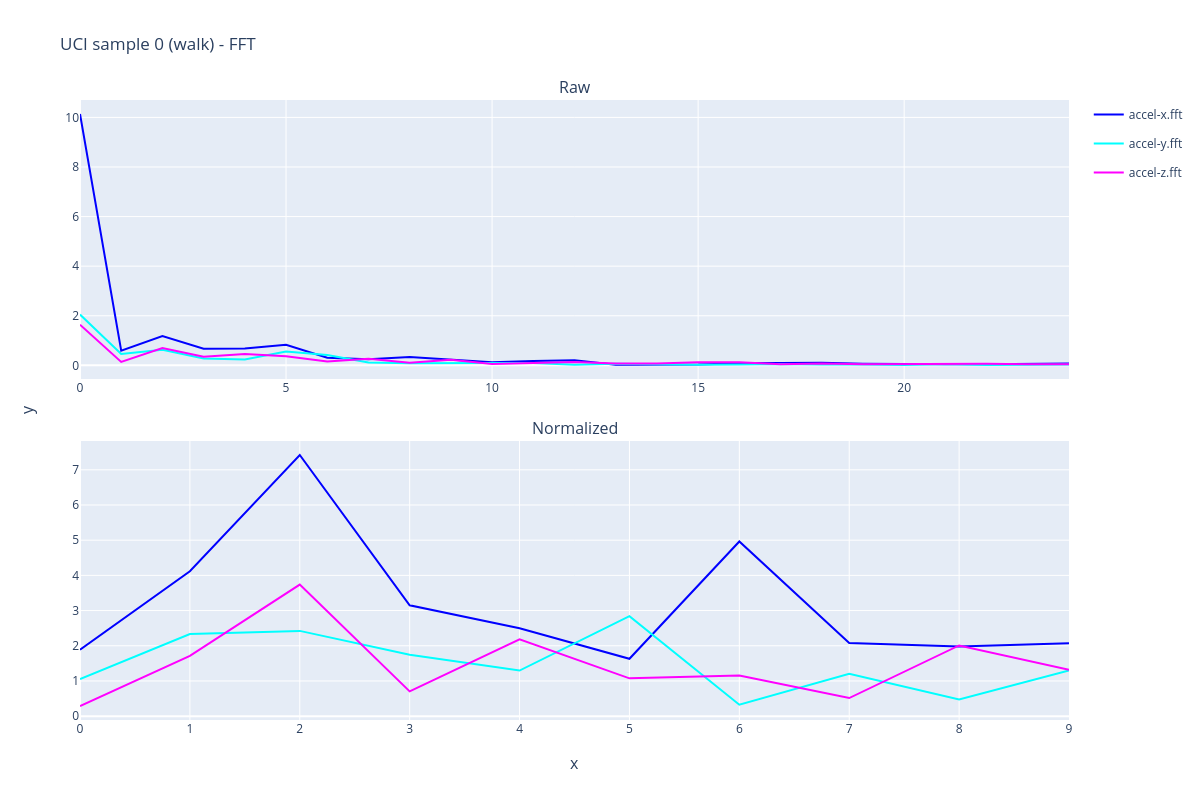

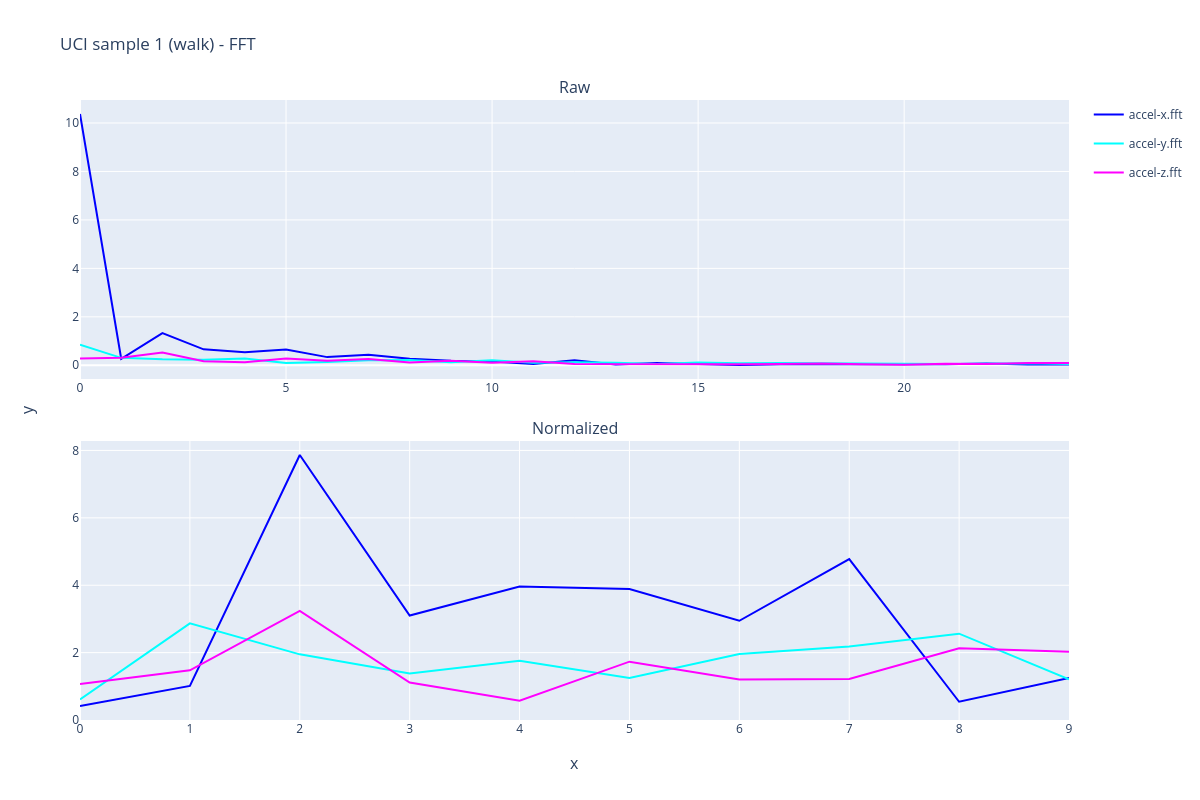

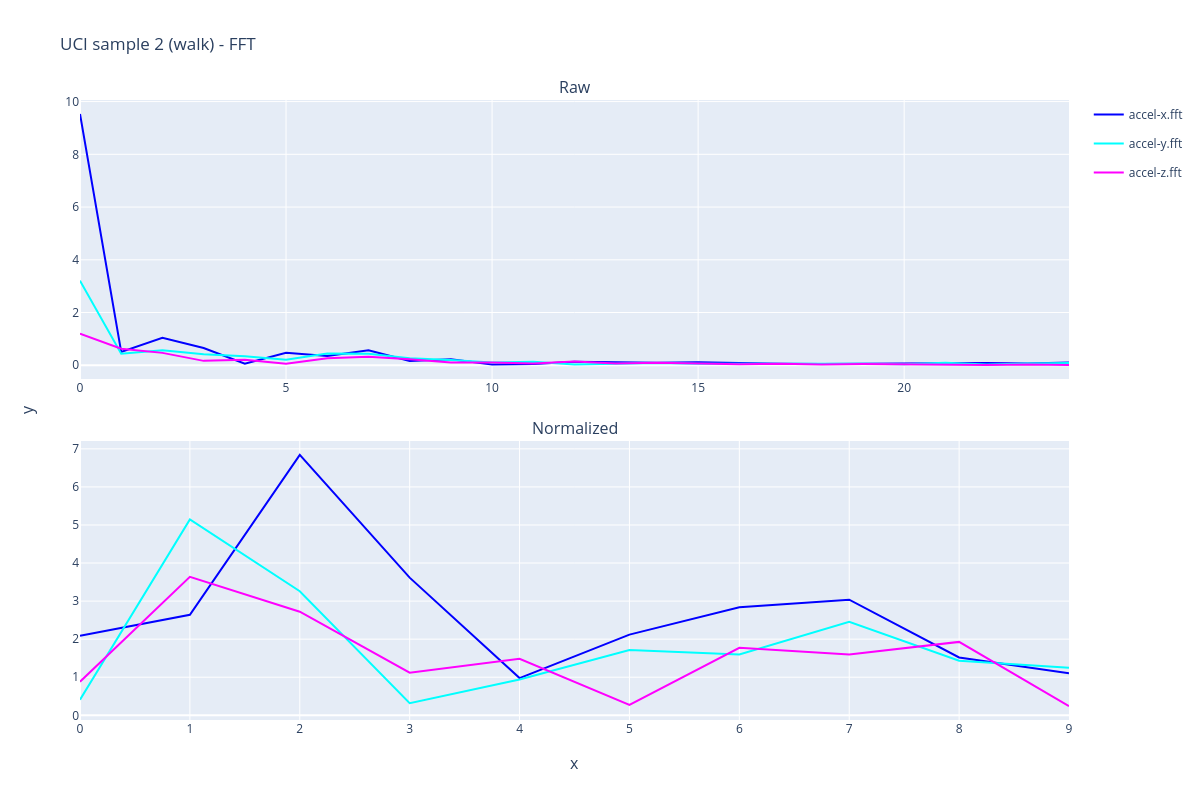

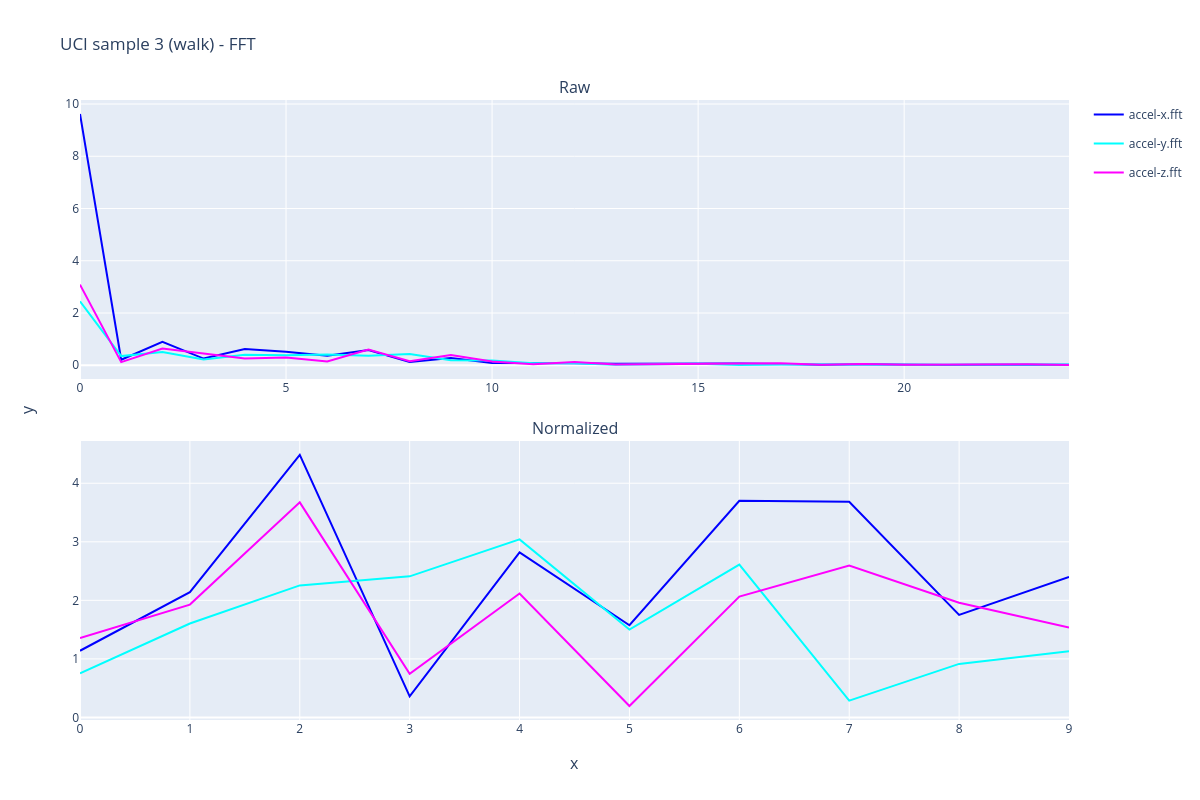

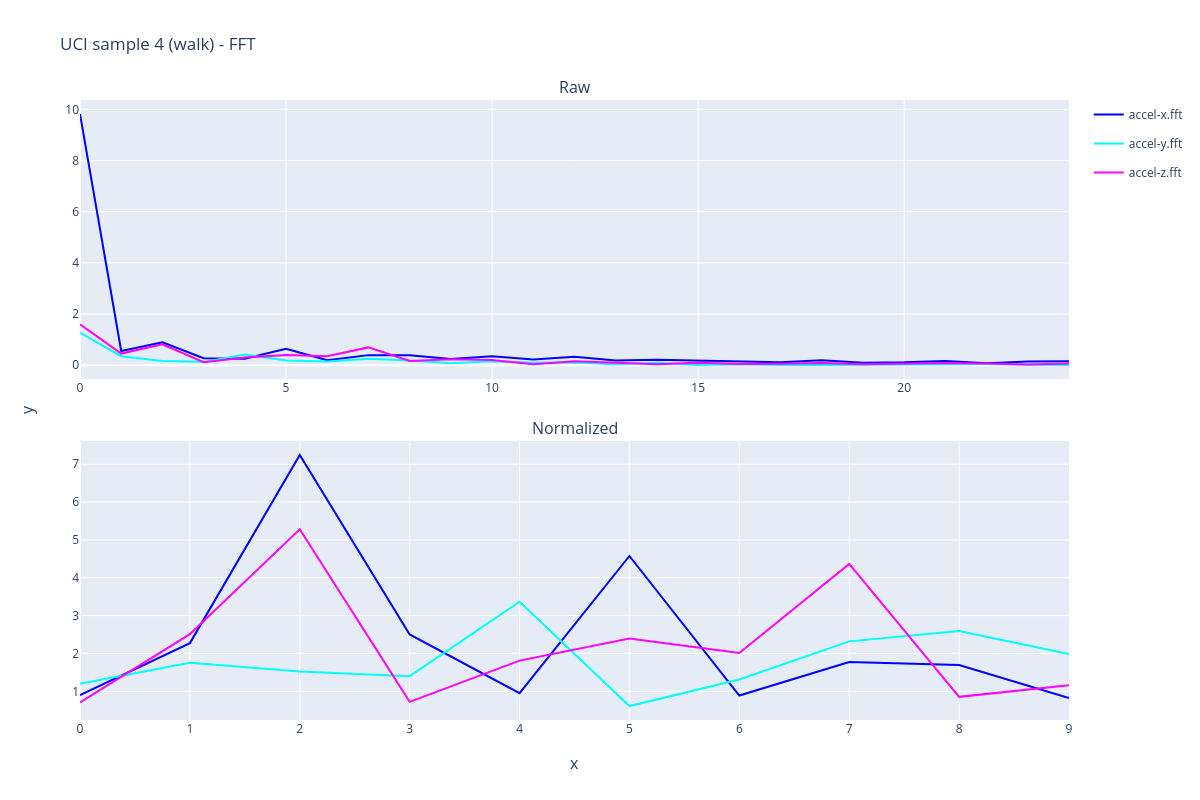

In [35]:
for i in selected_samples:
    label = standartized_codes[train_raw[i][1]]

    fig = generate_plots(
        fft_train_raw,
        fft_train_processed,
        sample_no=i,
        windows=["accel-x.fft", "accel-y.fft", "accel-z.fft"],
        height=800,
        width=1200,
        names=["Raw", "Normalized"],
        vertical_spacing=0.1,
        title=f"UCI sample {i} ({label}) - FFT",
        x_title="x",
        y_title="y",
        the_slice=slice(0, 30, 1)
    )
    fig.show("png")

In [36]:
from sklearn.ensemble import RandomForestClassifier
from umap import UMAP
from librep.datasets.multimodal.operations import (
    DatasetFitter,
    DatasetPredicter,
    DatasetWindowedTransform,
    DatasetY,
    DatasetEvaluator,
    DatasetTransformer,
)
from librep.metrics.report import ClassificationReport


def train_rf(train_dset, test_dset, use_umap=False):
    if use_umap:
        umap_model = UMAP(n_neighbors=5, n_components=5, metric="euclidean")
        DatasetFitter(umap_model, use_y=False)(train_dset)
        train_dset = DatasetTransformer(umap_model)(train_dset)
        test_dset = DatasetTransformer(umap_model)(test_dset)
    
    model = RandomForestClassifier()
    DatasetFitter(model, use_y=True)(train_dset)
    y_pred = DatasetPredicter(model)(test_dset)
    y_true = DatasetY()(test_dset)
    return DatasetEvaluator(ClassificationReport(normalize="all"))(y_true, y_pred)


# Classification without dimension reduction

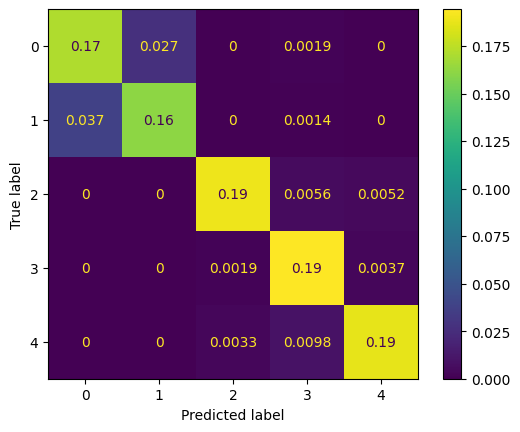

{'accuracy': 0.9030444964871195, 'f1 score (weighted)': 0.9028895163047735, 'f1 score (micro)': 0.9030444964871195, 'f1 score (macro)': 0.9028895163047735, 'confusion matrix': [[366, 57, 0, 4, 0], [80, 344, 0, 3, 0], [0, 0, 404, 12, 11], [0, 0, 4, 415, 8], [0, 0, 7, 21, 399]]}


In [37]:
fft_train_validation_raw = fft_train_raw.concatenate(fft_validation_raw)
result = train_rf(fft_train_validation_raw, fft_test_raw)
print(result)

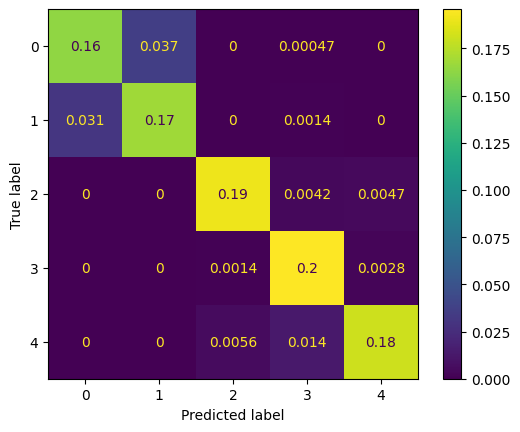

{'accuracy': 0.898360655737705, 'f1 score (weighted)': 0.8981990898204055, 'f1 score (micro)': 0.898360655737705, 'f1 score (macro)': 0.8981990898204055, 'confusion matrix': [[348, 78, 0, 1, 0], [66, 358, 0, 3, 0], [0, 0, 408, 9, 10], [0, 0, 3, 418, 6], [0, 0, 12, 29, 386]]}


In [38]:
fft_train_validation_processed = fft_train_processed.concatenate(fft_validation_processed)
result = train_rf(fft_train_validation_processed, fft_test_processed)
print(result)

# Classification with dimension reduction

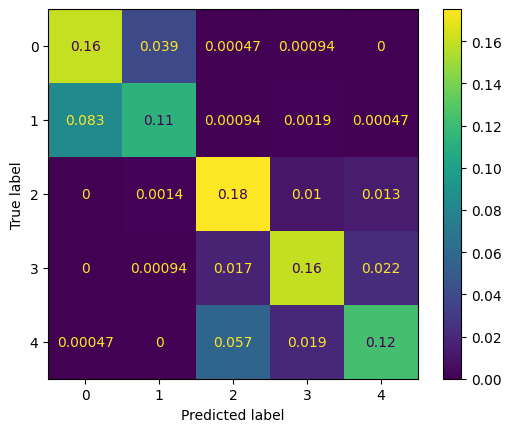

{'accuracy': 0.7311475409836066, 'f1 score (weighted)': 0.7275957558849176, 'f1 score (micro)': 0.7311475409836066, 'f1 score (macro)': 0.7275957558849175, 'confusion matrix': [[341, 83, 1, 2, 0], [178, 242, 2, 4, 1], [0, 3, 374, 22, 28], [0, 2, 37, 340, 48], [1, 0, 121, 41, 264]]}


In [39]:
fft_train_validation_raw = fft_train_raw.concatenate(fft_validation_raw)
result = train_rf(fft_train_validation_raw, fft_test_raw, use_umap=True)
print(result)

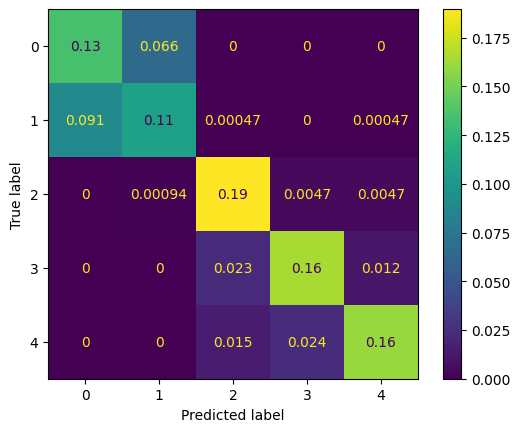

{'accuracy': 0.7578454332552693, 'f1 score (weighted)': 0.7566299859392629, 'f1 score (micro)': 0.7578454332552693, 'f1 score (macro)': 0.7566299859392629, 'confusion matrix': [[287, 140, 0, 0, 0], [194, 231, 1, 0, 1], [0, 2, 405, 10, 10], [0, 0, 50, 352, 25], [0, 0, 33, 51, 343]]}


In [40]:
fft_train_validation_processed = fft_train_processed.concatenate(fft_validation_processed)
result = train_rf(fft_train_validation_processed, fft_test_processed,   use_umap=True)
print(result)